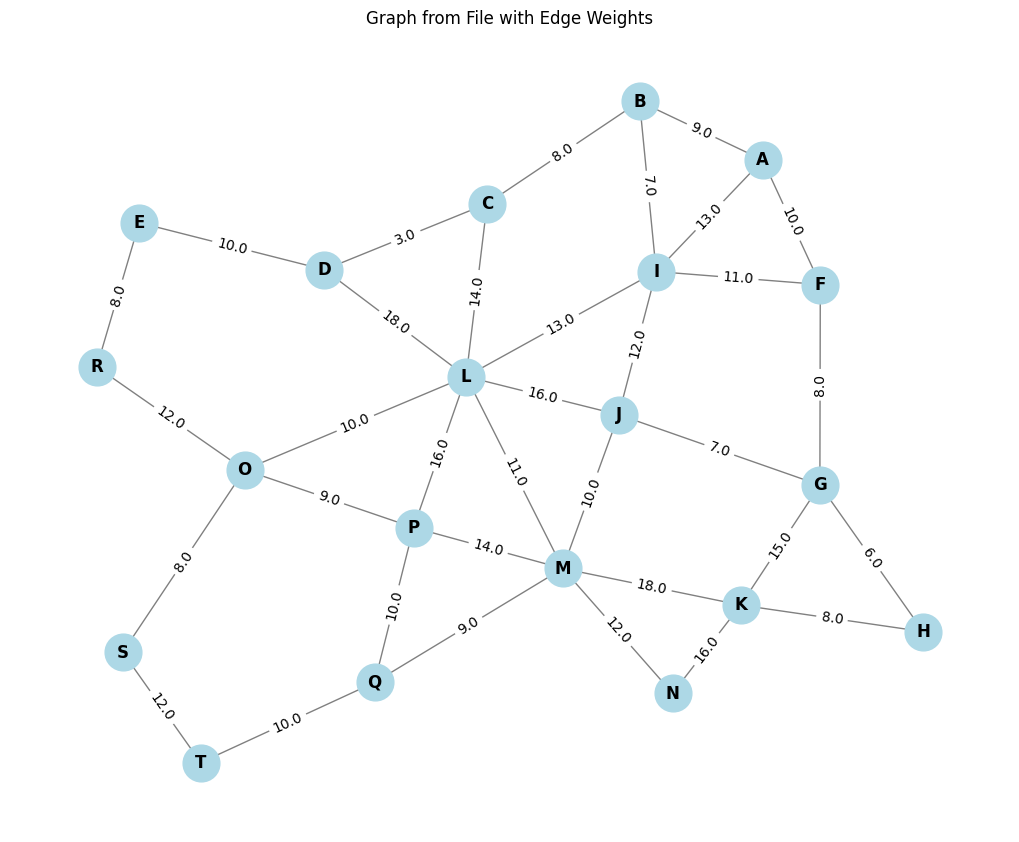

In [13]:
# Exibe o grafo do arquivo graph.txt
from functions import visualizar_grafo
visualizar_grafo("grafo.txt")

In [14]:
from functions import *
np.set_printoptions(threshold=np.inf)

# Utiliza ordem alfabetica para descoberta dos nós
def IDA_estrela(inicial, final, matriz_adj, heuristica):

    limite = heuristica[inicial]
    while True:
        descobertos = []
        # Conjunto de vertices que não foram explorados
        abertos = []
        # Distancia do inicial até o vertice, considerando somente as arestas
        distancia = dict()
        # Distancia do inicial até o vertice somada a heuristica do vertice até o final
        distancia_h = dict()
        pais = dict()

        prox_limite = np.inf

        # Adiciona todos os vertices no conjunto de abertos
        for vertice in range(len(matriz_adj)):
            if conexo_ao_grafo(vertice, matriz_adj):
                abertos.append(vertice)
                distancia[vertice] = np.inf
                distancia_h[vertice] = np.inf
        if len(matriz_adj) != len(abertos):
            print("O grafo possui vértices desconexos")

        # Descobre o vertice inicial e zera sua distancia
        descobertos.append(inicial)
        distancia[inicial] = 0

        # Inicializa a distancia+heuristica do vertice inicial
        distancia_h[inicial] = 0 + heuristica[inicial]

        if inicial+1 > len(matriz_adj) or final+1 > len(matriz_adj):
            print("Vertice inicial ou final não existe no grafo")
            return []
        while len(abertos) != 0:
            print("Abertos (v: dist+heur): ", [f"{int_to_letter(i+1)}: {distancia_h[i]}" for i in distancia_h if i in abertos])
            # Obtem o vertice de menor soma da distancia de arestas desde a origem mais a heuristica dele até o destino
            v = abertos.pop(obter_indice_de_menor_metrica(abertos, distancia_h))
            if distancia_h[v] == np.inf:
                print(f"Profundidade {limite}: Sem Solução!", "\n")
                break
            print("Escolhido: ", int_to_letter(v+1))

            # Obtém os vizinhos do vertice v
            vizinhos = [i for i in obter_vizinhos(v, matriz_adj) if i in abertos]
            print("Vizinhos (v: dist+heur):", [f"{int_to_letter(i+1)}: {distancia[v] + matriz_adj[v][i] + heuristica[i]}" for i in vizinhos], "\n")

            for vizinho in vizinhos:
                if distancia[v] + matriz_adj[v][vizinho] + heuristica[vizinho] <= limite:
                    # Descobre cada vizinho e os adiciona na fila para serem explorados
                    descobertos.append(vizinho)
                    # Se a distancia encontrada for menor que a guardada, ele substitui a distância
                    if distancia[v] + matriz_adj[v][vizinho] < distancia[vizinho]:
                        distancia[vizinho] = distancia[v] + matriz_adj[v][vizinho]
                        distancia_h[vizinho] = distancia[vizinho] + heuristica[vizinho]
                        pais[vizinho] = v
                else:
                    if distancia[v] + matriz_adj[v][vizinho] + heuristica[vizinho] < prox_limite:
                        prox_limite = distancia[v] + matriz_adj[v][vizinho] + heuristica[vizinho]
        if limite == prox_limite:
            return descobertos, pais
        print(f"Nova Profundidade: {prox_limite}")
        limite = prox_limite

matriz_adj = gerar_matriz_adjacente("grafo.txt")
heuristica = gerar_heuristicas("heuristica.txt")
inicial, final = letter_to_int("G")-1, letter_to_int("S")-1 # Retorna o número correspondente a ordem alfabética

descobertos, pais = IDA_estrela(inicial, final, matriz_adj, heuristica)

imprimir_resultado(incrementar(descobertos), usarLetras=True)

Abertos (v: dist+heur):  ['A: inf', 'B: inf', 'C: inf', 'D: inf', 'E: inf', 'F: inf', 'G: 35', 'H: inf', 'I: inf', 'J: inf', 'K: inf', 'L: inf', 'M: inf', 'N: inf', 'O: inf', 'P: inf', 'Q: inf', 'R: inf', 'S: inf', 'T: inf']
Escolhido:  G
Vizinhos (v: dist+heur): ['F: 43.0', 'H: 46.0', 'J: 37.0', 'K: 53.0'] 

Abertos (v: dist+heur):  ['A: inf', 'B: inf', 'C: inf', 'D: inf', 'E: inf', 'F: inf', 'H: inf', 'I: inf', 'J: inf', 'K: inf', 'L: inf', 'M: inf', 'N: inf', 'O: inf', 'P: inf', 'Q: inf', 'R: inf', 'S: inf', 'T: inf']
Profundidade 35: Sem Solução! 

Nova Profundidade: 37.0
Abertos (v: dist+heur):  ['A: inf', 'B: inf', 'C: inf', 'D: inf', 'E: inf', 'F: inf', 'G: 35', 'H: inf', 'I: inf', 'J: inf', 'K: inf', 'L: inf', 'M: inf', 'N: inf', 'O: inf', 'P: inf', 'Q: inf', 'R: inf', 'S: inf', 'T: inf']
Escolhido:  G
Vizinhos (v: dist+heur): ['F: 43.0', 'H: 46.0', 'J: 37.0', 'K: 53.0'] 

Abertos (v: dist+heur):  ['A: inf', 'B: inf', 'C: inf', 'D: inf', 'E: inf', 'F: inf', 'H: inf', 'I: inf', 

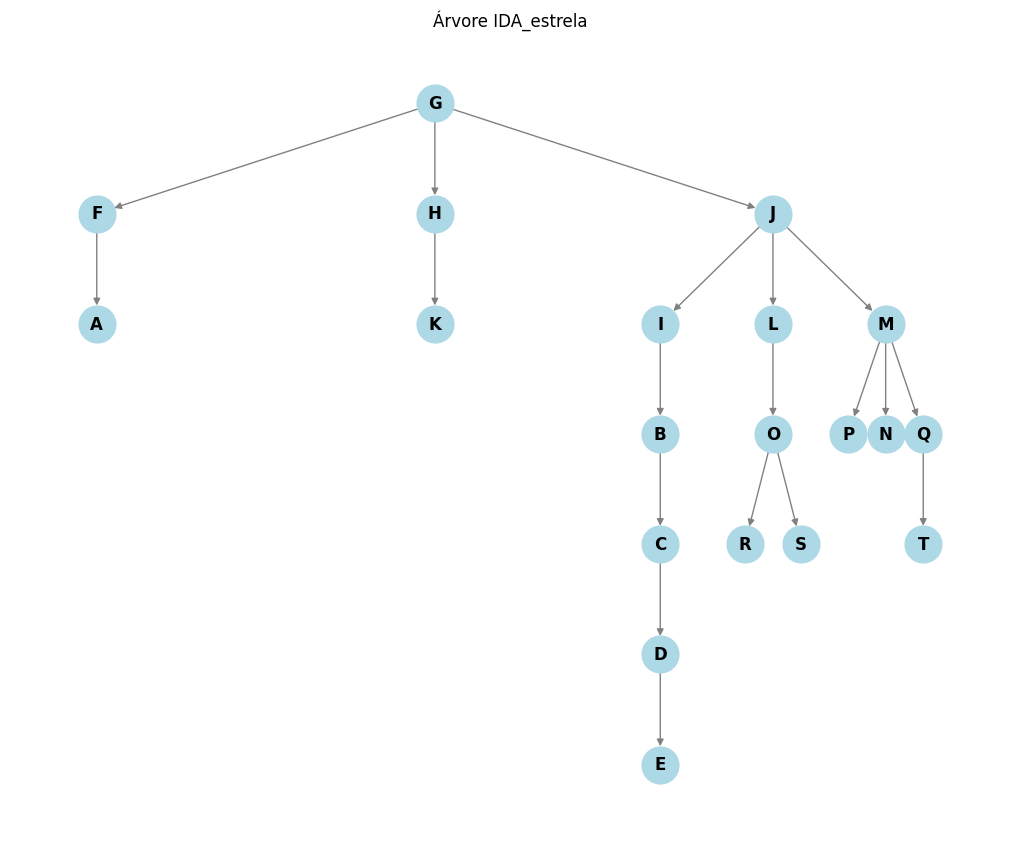

In [15]:
visualizar_arvore_de_pais(incrementar(pais), usarLetras=True, titulo="Árvore IDA_estrela")